# RNG Tessellation Generation
Generates tessellations using a random uniform distribution to guide the drawing line.

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..") # Move execution to root dir

In [2]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt 

from tessellation.draw import Drawer
from tessellation.procgen.rng.rng_generator import RNGGenerator

## Config

In [3]:
# Proc gen constants
SEED = 32
SIDE_LEN = 100

# Draw constants
CMAP = "gray"
drawer = Drawer(CMAP)

# Save config
SAVE_DIR = Path(f"saved_tessellations/ga/")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

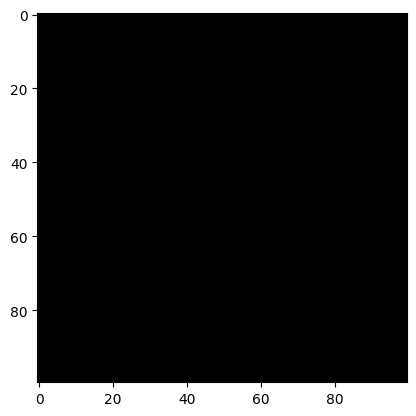

In [4]:
drawer.draw(np.zeros((SIDE_LEN, SIDE_LEN), dtype=int))

## RNG Tessellation Generator

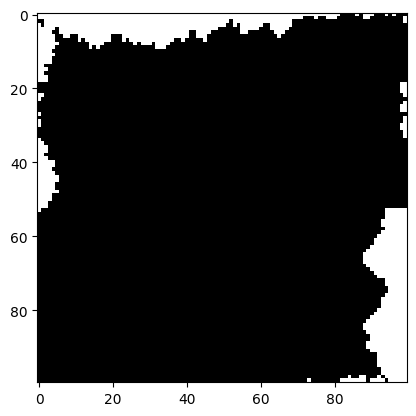

In [5]:
generator = RNGGenerator(SIDE_LEN)
result = generator.generate()
drawer.draw(result.mask)

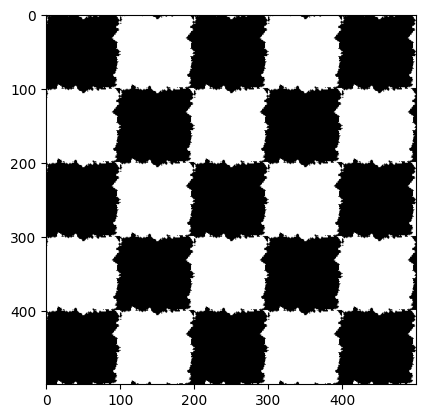

Press 's' to save, 'q' to quit, or 'enter' to continue...


 q


In [6]:
from IPython.display import clear_output


should_continue = True
while should_continue:    
    result = generator.generate()
    tessellation = drawer.tessellate(result)
    drawer.draw(tessellation)
    
    plt.show()
    print("Press 's' to save, 'q' to quit, or 'enter' to continue...")
    while True:
        user_action = input()
        if not user_action:
            break

        elif user_action.lower() == "s":
            print(
                "Provide a name for the tessellation, or click 'enter' to use timestamp as name..."
            )
            save_name = input()
            if not save_name:
                save_name = f"{datetime.today().isoformat()}"

            result.save_as_json(SAVE_DIR / f"{save_name}.json")
            drawer.save_as_png(SAVE_DIR / f"{save_name}.png", result.mask)
            break
        elif user_action.lower() == "q":
            should_continue = False
            break

    # Keeps output clean
    if should_continue:
        clear_output()